In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
data = pd.read_csv("The-Office-Lines-V2.csv")
data.head(10)

,season,episode,title,scene,speaker,line
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So..."
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah."
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done."
5,1,1,Pilot,2,Michael,"Yes, I'd like to speak to your office manager..."
6,1,1,Pilot,3,Michael,"I've, uh, I've been at Dunder Mifflin for 12 y..."
7,1,1,Pilot,3,Pam,Well. I don't know.
8,1,1,Pilot,3,Michael,"If you think she's cute now, you should have s..."
9,1,1,Pilot,3,Pam,What?


In [3]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
data['clean_msg']= data['line'].apply(lambda x:remove_punctuation(x))
#data.clean_msg[]
data.head()

,season,episode,title,scene,speaker,line,clean_msg
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,All right Jim Your quarterlies look very good ...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",Oh I told you I couldnt close it So
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,So youve come to the master for guidance Is th...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",Actually you called me in here but yeah
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",All right Well let me show you how its done


In [5]:
data['msg_lower']= data['clean_msg'].apply(lambda x: x.lower())

In [6]:
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))
data.head()

,season,episode,title,scene,speaker,line,clean_msg,msg_lower,msg_tokenied
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,All right Jim Your quarterlies look very good ...,all right jim your quarterlies look very good ...,[all right jim your quarterlies look very good...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",Oh I told you I couldnt close it So,oh i told you i couldnt close it so,[oh i told you i couldnt close it so]
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,So youve come to the master for guidance Is th...,so youve come to the master for guidance is th...,[so youve come to the master for guidance is t...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",Actually you called me in here but yeah,actually you called me in here but yeah,[actually you called me in here but yeah]
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",All right Well let me show you how its done,all right well let me show you how its done,[all right well let me show you how its done]


In [7]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RUTVA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [8]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [9]:
data['no_stopwords']= data['msg_tokenied'].apply(lambda x:remove_stopwords(x))
data.head()

,season,episode,title,scene,speaker,line,clean_msg,msg_lower,msg_tokenied,no_stopwords
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,All right Jim Your quarterlies look very good ...,all right jim your quarterlies look very good ...,[all right jim your quarterlies look very good...,[all right jim your quarterlies look very good...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",Oh I told you I couldnt close it So,oh i told you i couldnt close it so,[oh i told you i couldnt close it so],[oh i told you i couldnt close it so]
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,So youve come to the master for guidance Is th...,so youve come to the master for guidance is th...,[so youve come to the master for guidance is t...,[so youve come to the master for guidance is t...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",Actually you called me in here but yeah,actually you called me in here but yeah,[actually you called me in here but yeah],[actually you called me in here but yeah]
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",All right Well let me show you how its done,all right well let me show you how its done,[all right well let me show you how its done],[all right well let me show you how its done]


In [10]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

def stemming(text):
    stems = [porter_stemmer.stem(word) for word in text]
    return stems
data['msg_stemmed']=data['no_stopwords'].apply(lambda x: stemming(x))
data.head()

,season,episode,title,scene,speaker,line,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,All right Jim Your quarterlies look very good ...,all right jim your quarterlies look very good ...,[all right jim your quarterlies look very good...,[all right jim your quarterlies look very good...,[all right jim your quarterlies look very good...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",Oh I told you I couldnt close it So,oh i told you i couldnt close it so,[oh i told you i couldnt close it so],[oh i told you i couldnt close it so],[oh i told you i couldnt close it so]
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,So youve come to the master for guidance Is th...,so youve come to the master for guidance is th...,[so youve come to the master for guidance is t...,[so youve come to the master for guidance is t...,[so youve come to the master for guidance is t...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",Actually you called me in here but yeah,actually you called me in here but yeah,[actually you called me in here but yeah],[actually you called me in here but yeah],[actually you called me in here but yeah]
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",All right Well let me show you how its done,all right well let me show you how its done,[all right well let me show you how its done],[all right well let me show you how its done],[all right well let me show you how its don]


In [11]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


def lemmatizer(text):
    lemm = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm
data['msg_lemmatized']=data['no_stopwords'].apply(lambda x:lemmatizer(x))
data.head()

,season,episode,title,scene,speaker,line,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,All right Jim Your quarterlies look very good ...,all right jim your quarterlies look very good ...,[all right jim your quarterlies look very good...,[all right jim your quarterlies look very good...,[all right jim your quarterlies look very good...,[all right jim your quarterlies look very good...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",Oh I told you I couldnt close it So,oh i told you i couldnt close it so,[oh i told you i couldnt close it so],[oh i told you i couldnt close it so],[oh i told you i couldnt close it so],[oh i told you i couldnt close it so]
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,So youve come to the master for guidance Is th...,so youve come to the master for guidance is th...,[so youve come to the master for guidance is t...,[so youve come to the master for guidance is t...,[so youve come to the master for guidance is t...,[so youve come to the master for guidance is t...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",Actually you called me in here but yeah,actually you called me in here but yeah,[actually you called me in here but yeah],[actually you called me in here but yeah],[actually you called me in here but yeah],[actually you called me in here but yeah]
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",All right Well let me show you how its done,all right well let me show you how its done,[all right well let me show you how its done],[all right well let me show you how its done],[all right well let me show you how its don],[all right well let me show you how its done]


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer(stop_words='english')
vectorizer.fit(data['msg_lower'])
vt=vectorizer.get_feature_names()
vt

['00',
 '00983126',
 '0175',
 '019',
 '05',
 '050',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '10001',
 '100k',
 '101',
 '1012',
 '102',
 '103',
 '1030',
 '105',
 '107',
 '107th',
 '109',
 '10am',
 '10s',
 '10th',
 '11',
 '1100th',
 '1115',
 '1120',
 '1123',
 '1130',
 '1138',
 '115',
 '117',
 '11th',
 '12',
 '120',
 '1200',
 '12000',
 '1200000',
 '1201',
 '1220',
 '123',
 '1245',
 '125',
 '127',
 '128',
 '129',
 '1299',
 '12pack',
 '12th',
 '13',
 '132',
 '134',
 '13th',
 '14',
 '140',
 '142',
 '1434967',
 '147',
 '1490s',
 '15',
 '150',
 '1500',
 '150000',
 '156',
 '16',
 '160',
 '1600',
 '1600acre',
 '165',
 '16641',
 '16bond',
 '17',
 '1752',
 '17th',
 '18',
 '180',
 '18000',
 '1808',
 '1816',
 '185',
 '18505',
 '1864',
 '1865',
 '1866',
 '1890',
 '19',
 '190',
 '1930s',
 '1949',
 '1955',
 '1960s',
 '1967',
 '1970s',
 '1972',
 '1980',
 '1980s',
 '1982',
 '1983',
 '1985',
 '199',
 '1992',
 '1995',
 '1996',
 '1999',
 '19th',
 '1st',
 '20',
 '200',
 '2000',
 '20000',
 '2001',
 '200

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvectorizer = TfidfVectorizer(stop_words='english')
tfvectorizer.fit(data['msg_lower'])
tfvectorizer.vocabulary_

{'right': 15080,
 'jim': 9699,
 'quarterlies': 14273,
 'look': 10648,
 'good': 7736,
 'things': 18138,
 'library': 10424,
 'oh': 12437,
 'told': 18385,
 'close': 3644,
 'youve': 20363,
 'come': 3825,
 'master': 11039,
 'guidance': 8023,
 'youre': 20353,
 'saying': 15570,
 'grasshopper': 7864,
 'actually': 505,
 'called': 2850,
 'yeah': 20258,
 'let': 10386,
 'yes': 20303,
 'id': 8942,
 'like': 10471,
 'speak': 16834,
 'office': 12420,
 'manager': 10902,
 'hello': 8436,
 'michael': 11324,
 'scott': 15675,
 'regional': 14692,
 'dunder': 5791,
 'mifflin': 11371,
 'paper': 12917,
 'products': 14001,
 'just': 9841,
 'wanted': 19562,
 'talk': 17796,
 'manageramanger': 10903,
 'deal': 4825,
 'thank': 18054,
 'sir': 16305,
 'gentleman': 7557,
 'scholar': 15625,
 'im': 9000,
 'sorry': 16758,
 'ok': 12469,
 'mistake': 11511,
 'woman': 20046,
 'talking': 17800,
 'low': 10715,
 'voice': 19441,
 'probably': 13973,
 'smoker': 16548,
 'thats': 18075,
 'way': 19654,
 'ive': 9571,
 'uh': 18852,
 '12': 

In [14]:
def vectorization(msg_lower):
    corpus = [tokenize(doc) for doc in msg_lower]
    texts  = TextCollection(corpus)

    for doc in corpus:
        yield {
            term: texts.tf_idf(term, doc)
            for term in doc
        }

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer()
corpus = tfidf.fit_transform(data.msg_lower)
corpus

<54167x20722 sparse matrix of type '<class 'numpy.float64'>'
	with 477658 stored elements in Compressed Sparse Row format>

In [16]:
def get_non_glove_words(dataframe, column, model):
    # Unique Words
    counts = dataframe[column].str.split(expand=True).stack().value_counts(dropna=False).rename_axis('unique_words').reset_index(name='counts')
    # Extracting Glove Words and Non Glove Words
    non_glove_words = []
    glove_words = []
    for i in counts['unique_words']:
        try:
            model.get_vector(i)
        except KeyError:
            non_glove_words.append(i)
        else:
            glove_words.append(i)
    #Non-Glove words
    non_glove_words_df = pd.DataFrame({'unique_non_glove_words':non_glove_words})
    non_glove_words_df = pd.merge(non_glove_words_df,counts,how='left',left_on=['unique_non_glove_words'],right_on=['unique_words']).iloc[:,[0,2]]
    non_glove_words_df['cum_perc'] = round(100*non_glove_words_df["counts"].cumsum()/non_glove_words_df["counts"].sum(),2)
    print('Done')
    return(non_glove_words_df)

In [17]:
from gensim.models import KeyedVectors
filename = 'glove.6B.100d.txt'
model = KeyedVectors.load_word2vec_format(filename , binary=False)
    
non_glove_words_df = get_non_glove_words(data, column = 'msg_lower', model = model)
print(len(non_glove_words_df))

Done
7513


In [18]:
import sys
def extract_vectors(dataframe, column, method, non_glove_words_df, n=3):
    if method=="first_n_words":
        #Approach: First n words
        #Add 'blank' to words less than n
        dataframe['Length_Glove_Words'] = dataframe[column].str.split().str.len()
        def blank_words (row, n):
            for i in range(1,n+1) :
                if row['Length_Glove_Words'] == i :
                    return ' blank' * (n-i)
        dataframe['Words'] = dataframe.apply(lambda row: blank_words(row,n),axis=1)
        dataframe['Top_Words'] = dataframe[column].fillna('') + dataframe['Words'].fillna('')
        dataframe.drop(['Length_Glove_Words','Words'], axis=1, inplace=True)
        #Select First n Words
        dataframe['Top_Words'] = dataframe['Top_Words'].str.split().str[0:n].str.join(' ')
        non_glove=list(non_glove_words_df['unique_non_glove_words'].unique())
        dataframe=dataframe[~dataframe['Top_Words'].apply(lambda x: any([k in x for k in non_glove]))]
        dataframe.Top_Words.replace('', np.nan, inplace=True)
        dataframe.dropna(subset=['Top_Words'], inplace=True)
        print(dataframe)
        #Add Glove embeddings
        gloveFile = "glove.6B.100.txt"
        Glovewords = pd.read_table(gloveFile, sep=" ", index_col=0, header=None, quoting=3)
        # Unique words
        unique = list(dataframe['Top_Words'].str.split(' ', expand=True).stack().unique())
        while("" in unique) :
            unique.remove("")
        #print(unique)
        unique_word_vec=Glovewords.loc[unique].T.to_dict('list')
        #print(unique_word_vec)
        del Glovewords,unique
        #Glove vectors for top 3 words        
        j=0
        length = len(dataframe)-1
        stack = list()
        for index, row in dataframe.iterrows():
            df = []
            for i in range(0,n):
                df = np.append(df,unique_word_vec[row.Top_Words.split(' ')[i]])            
            #df = np.append(df,unique_word_vec[row.Top_Words])
            stack.extend(np.vstack(df).T)
            if j==length:
                print('\rProgress:  100%', end='')
                sys.stdout.flush()
            elif j%100==0:
                print('\rProgress: %d' % j, end='')
                sys.stdout.flush()
            j+=1
        del unique_word_vec
        stack=pd.DataFrame(stack)
        cluster_dataset = dataframe[["Top_Words"]]
        cluster_dataset = pd.concat([cluster_dataset.reset_index(drop=True), stack], axis=1)
        del stack
        return cluster_dataset
    elif method == "sum_word_vectors":        
        #Approach: Sum of d word vectors for n words
        #Add Glove embeddings
        dataframe['Top_Words'] = dataframe[column].str.split().str.join(' ')
        #Select First n Words
        non_glove=list(non_glove_words_df['unique_non_glove_words'].unique())
        dataframe=dataframe[~dataframe['Top_Words'].apply(lambda x: any([k in x for k in non_glove]))]
        dataframe.Top_Words.replace('', np.nan, inplace=True)
        dataframe.dropna(subset=['Top_Words'], inplace=True)
        print(dataframe)
        gloveFile = "glove.6B.100.txt"
        Glovewords = pd.read_table(gloveFile, sep=" ", index_col=0, header=None, quoting=3)
        # Unique words
        unique = list(dataframe['Top_Words'].str.split(' ', expand=True).stack().unique())
        while("" in unique) :
            unique.remove("")
        #print(unique)
        unique_word_vec=Glovewords.loc[unique].T.to_dict('list')
        #print(unique_word_vec)
        del Glovewords,unique
        #Sum of Glove vectors for n words
        from operator import add
        j=0
        length = len(dataframe)-1
        stack = list()
        for index, row in dataframe.iterrows():
            sum_word_vec = [0]*100
            for word in row['Top_Words'].split(' '):
                word_vec = unique_word_vec[word]
                sum_word_vec = list(map(add, sum_word_vec, word_vec))
            stack.extend([sum_word_vec])
            if j==length:
               print('\rProgress:  100%', end='')
               sys.stdout.flush()
            elif j%100==0:
               print('\rProgress: %d' % j, end='')
               sys.stdout.flush()
            j+=1
        stack=pd.DataFrame(stack)
        cluster_dataset = dataframe[['Top_Words']]
        cluster_dataset = pd.concat([cluster_dataset.reset_index(drop=True), stack], axis=1)
        del stack
        return cluster_dataset
    

In [19]:
cluster_dataset = extract_vectors(data,column='msg_lower',method='first_n_words', non_glove_words_df = non_glove_words_df, n=3)  

C:\Users\RUTVA\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\RUTVA\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


       season  episode   title  scene  speaker  \
5           1        1   Pilot      2  Michael   
8           1        1   Pilot      3  Michael   
12          1        1   Pilot      3  Michael   
14          1        1   Pilot      3  Michael   
16          1        1   Pilot      5   Dwight   
...       ...      ...     ...    ...      ...   
54152       9       24  Finale   7967    Creed   
54153       9       24  Finale   7968    Kevin   
54159       9       24  Finale   7969    Creed   
54162       9       24  Finale   7972    Creed   
54165       9       24  Finale   7975      Jim   

                                                    line  \
5       Yes, I'd like to speak to your office manager...   
8      If you think she's cute now, you should have s...   
12     Oh! Pam, this is from Corporate. How many time...   
14     It's called the wastepaper basket! Look at tha...   
16      Shall I play for you? Pa rum pump um pum  I h...   
...                                    

In [20]:
cluster_data = extract_vectors(data,column='msg_lower',method='sum_word_vectors', non_glove_words_df = non_glove_words_df)

C:\Users\RUTVA\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\RUTVA\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


       season  episode   title  scene  speaker  \
32          1        1   Pilot     10  Michael   
44          1        1   Pilot     10  Michael   
54          1        1   Pilot     11      Jan   
70          1        1   Pilot     15      Jim   
76          1        1   Pilot     17      Pam   
...       ...      ...     ...    ...      ...   
54140       9       24  Finale   7961    Kevin   
54150       9       24  Finale   7967    Creed   
54151       9       24  Finale   7967   Angela   
54152       9       24  Finale   7967    Creed   
54153       9       24  Finale   7968    Kevin   

                                           line  \
32                   Um... Me no get an agenda.   
44                                        OK...   
54                                    Go ahead.   
70                                         Yes?   
76                           This is Mr. Scott.   
...                                         ...   
54140                                  Oh,

In [23]:
cluster_data

,Top_Words,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,um me no get an agenda,-1.084628,0.692580,3.663260,-2.749717,-1.996200,0.725717,0.184280,1.419600,1.930173,...,0.691958,-0.031347,0.780098,0.083561,-1.520590,-1.093506,-1.228430,-1.736606,3.262369,2.213180
1,ok,0.212950,0.037070,1.012400,-0.674930,-0.881750,0.183730,0.000438,0.600140,0.417200,...,0.181270,-0.040203,-0.031254,-0.011978,-0.093409,0.025642,0.027521,-0.262160,-0.069477,-0.070536
2,go ahead,-0.356134,0.353860,1.334200,-1.118290,-0.121618,0.063110,-0.307916,0.486832,-0.804154,...,-0.571610,-0.007430,-0.340590,0.168760,-1.477320,-0.351513,0.855650,0.910810,1.088850,0.447620
3,yes,-0.050131,0.663560,0.843150,-0.752950,-0.428480,0.161000,-0.036730,0.074777,0.352510,...,-0.042350,-0.334790,0.243310,0.576450,-0.497790,0.072397,-0.263010,0.164890,0.048798,0.503590
4,this is mr scott,-1.962430,0.477857,1.539850,-1.732470,-0.157871,-0.560460,0.325199,1.108870,-1.227475,...,-0.790515,-0.959530,0.070390,1.242065,0.572976,0.490070,-0.309689,-2.273769,0.342010,-0.250350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8310,oh yes,-0.716781,1.096250,2.156550,-1.576960,-0.919670,-0.094390,0.135450,0.171268,1.087220,...,-0.151510,-0.499120,0.156946,1.390250,-0.824960,-0.201763,-0.186805,-1.230910,-0.194902,0.368850
8311,i still have my medal from that,0.849377,3.307820,2.681925,-2.924100,-1.830550,0.613169,-0.818724,1.887000,-1.177245,...,-1.392756,-0.956558,0.677409,1.542296,-4.232150,-0.213585,-2.864080,-2.355420,2.471868,2.817720
8312,do you even have a mattress,-1.341380,2.722386,1.723067,-2.766416,-2.070130,1.878490,-0.633456,1.815110,0.378480,...,0.369370,-1.069458,0.045360,-1.866313,-2.581865,-0.423666,-0.564240,-2.093001,2.760690,2.544910
8313,no but i still have my medal from that,0.778532,4.039030,3.969485,-4.121220,-2.848390,0.937259,-0.773154,2.200758,-0.088465,...,-1.312089,-2.105858,0.314408,1.981878,-5.552720,0.067599,-3.705060,-3.223270,2.956212,3.400290


In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [25]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(cluster_data.iloc[:,1:])
#del cluster_dataset

In [26]:
wcss = []
for i in range(1, 52, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 51

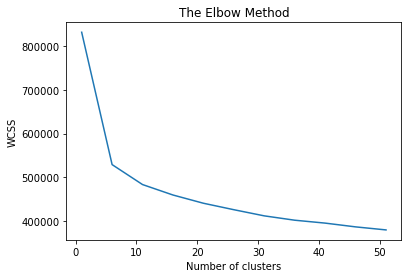

In [27]:
plt.plot(range(1, 52, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

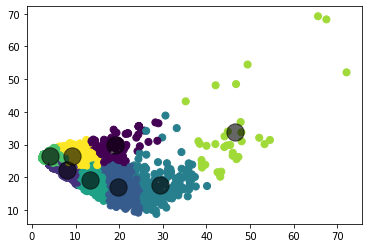

In [163]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)
plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)


In [165]:
y_kmeans.shape

(8315, 8)

In [50]:
cluster_data['CLUSTERS'] = kmeans.labels_
cluster_data.to_csv("cluster_sum_glove_vectors.csv",index=False)

<ipython-input-50-aa4339a95ef5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['CLUSTERS'] = kmeans.labels_


In [51]:
cluster_data = cluster_data[['Top_Words', 'CLUSTERS']]
cluster_data

,Top_Words,CLUSTERS
0,um me no get an agenda,4
1,ok,5
2,go ahead,5
3,yes,5
4,this is mr scott,1
...,...,...
8310,oh yes,5
8311,i still have my medal from that,2
8312,do you even have a mattress,4
8313,no but i still have my medal from that,2


In [52]:
cluster_data.to_csv("cluster_sum_glove_vectors.csv",index=False)

In [53]:
cluster_data.sort_values('CLUSTERS')

,Top_Words,CLUSTERS
8314,oscar oscar i think im gay,0
7058,hah yah boom,0
6991,and a wave crashing a wave crashing,0
2877,one two three one two three,0
6866,mama mama mama,0
...,...,...
6791,its almost too warm,7
1164,carol stills,7
352,safety partners,7
3579,uh its very insulting,7


In [54]:
cluster_data[cluster_data['CLUSTERS'] == 0].head(10)

,Top_Words,CLUSTERS
5,guilty guilty as charged,0
21,retaliation tit for tit,0
233,oh lazy uh huh,0
514,dar de dar,0
533,bop be blah bop be boo boo bop,0
651,chicken hot dog burger,0
689,bob vance vance refrigeration,0
690,bob vance vance refrigeration,0
691,bob vance vance refrigeration,0
707,ah ha ha ha,0


In [55]:
cluster_data[cluster_data['CLUSTERS'] == 1].head(10)

,Top_Words,CLUSTERS
4,this is mr scott,1
9,not gonna happen,1
10,can you promise that,1
13,damn it jim,1
15,you got a fax,1
16,are you serious,1
18,um are you,1
24,it was fine,1
31,wait a second,1
36,get out,1


In [56]:
cluster_data[cluster_data['CLUSTERS'] == 2].head(10)

,Top_Words,CLUSTERS
14,do i think ill be invited to the wedding,2
20,yes i do you want to,2
34,we all have a hero in our heart,2
41,oh man am i a woman,2
43,no way i think she likes this stuff,2
52,the gold plan im not even on that plan,2
56,yes i can do it im your man,2
59,its a great plan it saves the company a fortune,2
85,oh um jan wants you to call her,2
86,bottom line do i need to be worried,2


In [57]:
cluster_data[cluster_data['CLUSTERS'] == 3].head(10)

,Top_Words,CLUSTERS
70,yes i can im manager for the day clean out you...,3
126,i will use your talents come baseball season m...,3
133,no i am the team manager you can be assistant ...,3
263,forward it like its hot forward it like its ho...,3
297,i got your sausage egg and cheese biscuit,3
339,final lap final lap time to beat is 115,3
408,eat it you gotta eat it you have to eat it,3
433,that is not a very nice thing to say about him,3
448,i want you to be me and i will be creed,3
601,the it tech guy and me did not get off to a gr...,3


In [58]:
cluster_data[cluster_data['CLUSTERS'] == 4].head(10)

,Top_Words,CLUSTERS
0,um me no get an agenda,4
6,its not on your desk,4
22,that is not the expression,4
37,uh is that it,4
38,it was kind of hard to hear,4
39,i have a customer meeting,4
44,oh no the girl in the sketch,4
47,i think you do mon,4
51,uh not a bad day,4
63,so its not a free fall,4


In [59]:
cluster_data[cluster_data['CLUSTERS'] == 5].head(10)

,Top_Words,CLUSTERS
1,ok,5
2,go ahead,5
3,yes,5
8,go ahead,5
12,no,5
17,is,5
19,yes,5
25,martinez,5
26,lets celebrate,5
27,yes,5


In [60]:
cluster_data[cluster_data['CLUSTERS'] == 6].head(10)

,Top_Words,CLUSTERS
561,i guess i missed you i guess i missed you so s...,6
768,choo choo choo choo choo choo,6
1083,no its not its a type of pipe you can fill it ...,6
1361,love me love me say that you love me fool me f...,6
1363,go on and fool me love me love me say that you...,6
1365,love me say that you love me fool me fool me g...,6
2092,jim jim jim jim jim jim jim jim jim jim,6
2470,stop stop stop stop stop stop stop this is not...,6
2872,not to no i did not i did not cheat on you i d...,6
2950,i do no i do i i want to trust me i really do,6


In [61]:
cluster_data[cluster_data['CLUSTERS'] == 7].head(10)

,Top_Words,CLUSTERS
7,assistant to the regional manager,7
11,on his mothers grave,7
23,six on seven,7
60,its like a pay decrease,7
65,its an epidemic,7
71,jim open the door,7
78,this is jan,7
79,from sales,7
81,oh christ,7
83,ok the health care plan,7


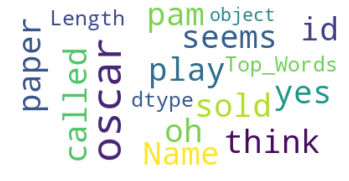

In [62]:
for i in cluster_data['CLUSTERS']:
    if i==0:
            word="".join(line for line in str(cluster_dataset.Top_Words))
            WC = WordCloud(max_font_size=50, background_color="White").generate(str(word))
    elif i==1:
            word="".join(line for line in str(cluster_dataset.Top_Words))
            WC = WordCloud(max_font_size=50, background_color="White").generate(str(word))
plt.imshow(WC, interpolation = 'bilinear')
plt.axis('off')
plt.show()



In [81]:
#for tag  in  kmeans.labels_ :
    #if tag==1:
        tags1=" ".join(0 for 0 in kmeans.labels_.0)
    #if tag==2:
        #tags2=element+" "+element[tag]
    #if tag==3:
        #tags3=element+" "+element[tag]

        wc2 = WordCloud(background_color = 'Grey', max_font_size=50, max_words=30).generate(tags1)

plt.imshow(wc2, interpolation='bilinear')

plt.axis("off")

plt.show()


IndentationError: unexpected indent (<ipython-input-81-dda01bafcb39>, line 3)

In [96]:
def ListClusterTexts(Top_Words,CLUSTERS,K) :
    return [Top_Words[i] for i in range(CLUSTERS.shape[0]) if CLUSTERS[i]==K]

"""concatinates all tokenised article texts in an article cluster into a single pseudo-natural text"""
def ConcatinateClusterTexts(Top_Words,CLUSTERS,K) :
    clusterText = ''
    for tag in ListClusterTexts(Top_Words,CLUSTERS,K) :
        clusterText+=' '.join(tag)
    return clusterText

"""counts the number of Top_Words in a cluster"""
def CountClusterTop_Words(Top_Words,CLUSTERS,K) :
    return len(ListClusterTexts(Top_Words,CLUSTERS,K))

"""creates a WordCloud object from natural text, which can be cast as an image or array of word frequencies"""
def CreateWordCloud(text) :
    #removes STOPWORDS from the chart to make more readable
    return WordCloud(background_color="white",
                     width=500,
                     height=500 ).generate(text)

"""converts natural text into a WordCloud object, and plots it using Matplotlib"""
def PlotWordCloud(text) :
    wordcloud = CreateWordCloud(text)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

"""takes an array of cluster IDs and converts it into an array of wordclouds from the text within each cluster"""
def PlotClusterWordCloudArray(Top_Words,CLUSTERS,n) :
    fig, axes = plt.subplots(n.shape[0], n.shape[1], figsize=(12,12))
    for i in range(n.shape[0]) :
        for j in range(n.shape[1]) :
            axes[i, j].imshow(CreateWordCloud(ConcatinateClusterTexts(Top_Words,CLUSTERS,n[i,j])))
            axes[i, j].axis("off")
            axes[i, j].set_title("Cluster "+str(n[i,j])+"; count="+str(CountClusterTop_Words(Top_Words,CLUSTERS,n[i,j])))
            

In [97]:
n = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 0]])

PlotClusterWordCloudArray('Top_Words','CLUSTERS','n')

AttributeError: 'str' object has no attribute 'shape'

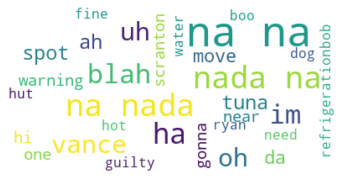

In [195]:
word="".join(line for line in (cluster_data[cluster_data['CLUSTERS']==0].Top_Words.values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

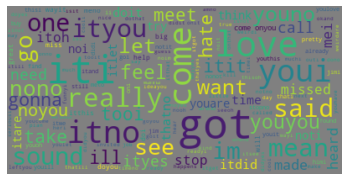

In [184]:
word="".join(line for line in (cluster_data[cluster_data['CLUSTERS']==1].Top_Words.values))
WC = WordCloud(max_font_size=50, background_color="Grey").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

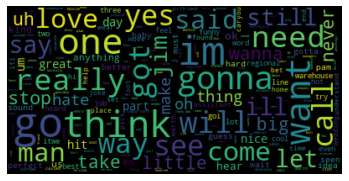

In [186]:
word="".join(line for line in (cluster_data[cluster_data['CLUSTERS']==2].Top_Words.values))
WC = WordCloud(max_font_size=50, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


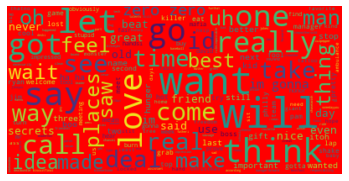

In [187]:
word="".join(line for line in (cluster_data[cluster_data['CLUSTERS']==3].Top_Words.values))
WC = WordCloud(max_font_size=50, background_color="red").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

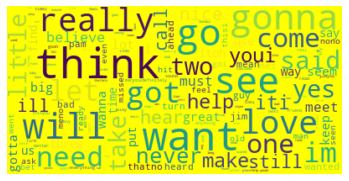

In [188]:
word="".join(line for line in (cluster_data[cluster_data['CLUSTERS']==4].Top_Words.values))
WC = WordCloud(max_font_size=50, background_color="Yellow").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

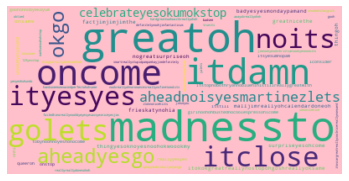

In [194]:
word="".join(line for line in (cluster_data[cluster_data['CLUSTERS']==5].Top_Words.values))
WC = WordCloud(max_font_size=50, background_color="Pink").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

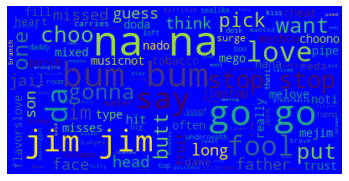

In [192]:
word="".join(line for line in (cluster_data[cluster_data['CLUSTERS']==6].Top_Words.values))
WC = WordCloud(max_font_size=50, background_color="Blue").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

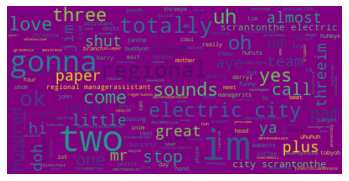

In [193]:
word="".join(line for line in (cluster_data[cluster_data['CLUSTERS']==7].Top_Words.values))
WC = WordCloud(max_font_size=50, background_color="Purple").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

In [253]:
top_words=[]
top_words= " ".join(cluster_data[cluster_data['CLUSTERS']==0].Top_Words).split()
top_words


['guilty',
 'guilty',
 'as',
 'charged',
 'retaliation',
 'tit',
 'for',
 'tit',
 'oh',
 'lazy',
 'uh',
 'huh',
 'dar',
 'de',
 'dar',
 'bop',
 'be',
 'blah',
 'bop',
 'be',
 'boo',
 'boo',
 'bop',
 'chicken',
 'hot',
 'dog',
 'burger',
 'bob',
 'vance',
 'vance',
 'refrigeration',
 'bob',
 'vance',
 'vance',
 'refrigeration',
 'bob',
 'vance',
 'vance',
 'refrigeration',
 'ah',
 'ha',
 'ha',
 'ha',
 'uh',
 'uh',
 'ok',
 'im',
 'fine',
 'im',
 'fine',
 'im',
 'fine',
 'hut',
 'hut',
 'hut',
 'hike',
 'nazi',
 'was',
 'a',
 'fascist',
 'movement',
 'ha',
 'ha',
 'ha',
 'ha',
 'wah',
 'gah',
 'an',
 'indian',
 'woman',
 'in',
 'a',
 'sari',
 'stamford',
 'connecticut',
 'stamford',
 'connecticut',
 'spot',
 'spot',
 'spot',
 'spot',
 'oh',
 'oh',
 'oh',
 'bob',
 'vance',
 'of',
 'vance',
 'refrigeration',
 'oh',
 'oh',
 'oh',
 'oh',
 'it',
 'hurts',
 'darryl',
 'darryl',
 'darryl',
 'um',
 'hi',
 'hi',
 'hi',
 'hi',
 '47',
 '48',
 '49',
 'jim',
 'wins',
 'im',
 'gonna',
 'need',
 'im',
 

In [242]:
count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

{'guilty': 2,
 'as': 2,
 'charged': 1,
 'retaliation': 1,
 'tit': 2,
 'for': 1,
 'oh': 16,
 'lazy': 1,
 'uh': 13,
 'huh': 7,
 'dar': 2,
 'de': 1,
 'bop': 3,
 'be': 2,
 'blah': 12,
 'boo': 2,
 'chicken': 1,
 'hot': 2,
 'dog': 2,
 'burger': 1,
 'bob': 4,
 'vance': 8,
 'refrigeration': 4,
 'ah': 11,
 'ha': 20,
 'ok': 1,
 'im': 14,
 'fine': 3,
 'hut': 3,
 'hike': 1,
 'nazi': 1,
 'was': 2,
 'a': 14,
 'fascist': 1,
 'movement': 1,
 'wah': 1,
 'gah': 1,
 'an': 1,
 'indian': 1,
 'woman': 1,
 'in': 6,
 'sari': 1,
 'stamford': 2,
 'connecticut': 2,
 'spot': 9,
 'of': 2,
 'it': 3,
 'hurts': 1,
 'darryl': 3,
 'um': 3,
 'hi': 4,
 '47': 1,
 '48': 1,
 '49': 1,
 'jim': 2,
 'wins': 1,
 'gonna': 3,
 'need': 2,
 'petty': 1,
 'cash': 1,
 'near': 5,
 'not': 2,
 'depressed': 1,
 'grief': 1,
 'water': 3,
 'babe': 1,
 'ryan': 4,
 'tuna': 8,
 'egg': 1,
 'dripping': 1,
 'utica': 3,
 'afro': 2,
 'wig': 2,
 'do': 1,
 'you': 1,
 'want': 1,
 'the': 6,
 'lets': 1,
 'move': 5,
 'call': 3,
 'her': 3,
 'one': 4,
 'two'

In [243]:
from operator import itemgetter
TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])

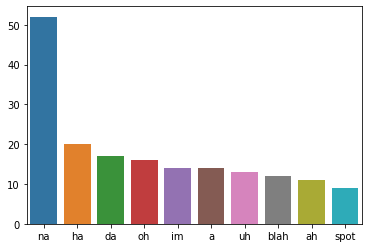

In [244]:
sns.barplot(list(TW.keys()), list(TW.values()))

In [236]:
sns.factorplot(data = cluster_data, x="CLUSTERS", y="top_words")

C:\Users\RUTVA\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


ValueError: Could not interpret input 'top_words'

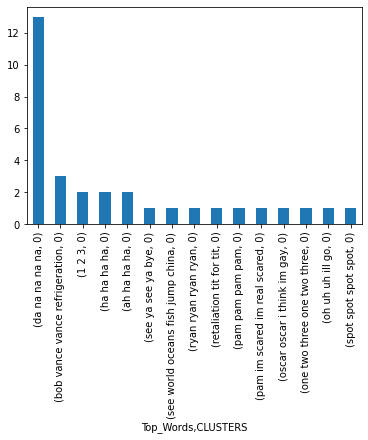

In [220]:
cluster_data[cluster_data['CLUSTERS']==0].value_counts().iloc[:15].plot(kind='bar') 

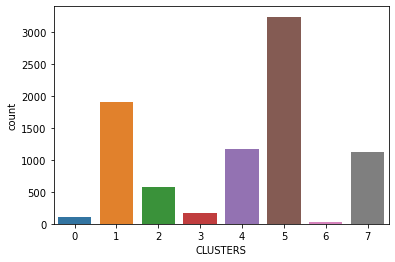

In [234]:
sns.countplot(cluster_data['CLUSTERS'])

In [151]:
tfvectorizer = TfidfVectorizer()
X = tfvectorizer.fit_transform(data['msg_lower'][:300])
tf_idf = pd.DataFrame(data = X.toarray(), columns=tfvectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

300 rows


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
library,0.358483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quarterlies,0.358483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
things,0.317166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
look,0.292996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jim,0.268827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
final_df

,100,12,1200,17,25,280z,50,78,99,about,...,yesterday,yet,yogurt,you,young,your,youre,yourself,youve,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.246908,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.187425,0.0,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.271806,0.0,0.338018,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.200650,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.167174,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0


In [161]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
        dfs



In [ ]:
def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

In [157]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [167]:
k = 8
kmeans_results = run_KMeans(k, final_df)

best_result = 5
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 50)

IndexError: list index out of range

In [168]:
plotWords(dfs, 20)

NameError: name 'dfs' is not defined

In [98]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

In [105]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.Top_Words   = final_df.Top_Words
generateWordClouds(centroids)

AttributeError: 'DataFrame' object has no attribute 'Top_Words'

In [140]:
def summary(dataframe, cluster_column, original_column, modified_column, top_n, show_original=False):
    df = dataframe.groupby([cluster_column])[["Clicks", "Impressions"]].sum()
    df['CTR'] = (df['Clicks']/df['Impressions'])*100
    df['Weighted Average Position'] = dataframe.groupby([cluster_column]).agg({'Average Position': lambda x: np.average(x, weights=data.loc[x.index, "Impressions"]) })
    df['Counts'] = dataframe.groupby([cluster_column])[[original_column]].size()
    
    if show_original==True:
        original_keywords = list()
        for i, row in df.iterrows():
            kws = ",".join(pd.Series(dataframe.loc[dataframe[cluster_column] == i,[original_column]].values.flatten()).str.split(expand=True).stack().value_counts(dropna=False).rename_axis('unique_words').reset_index(name='counts').loc[0:top_n-1,'unique_words'].tolist())
            original_keywords.extend([kws])        
        original_keywords = pd.DataFrame(original_keywords, columns=['Top Original Keywords'])
        df = pd.concat([df, original_keywords.reset_index(drop=True)], axis=1)
        
        modified_keywords = list()
    for i, row in df.iterrows():
        kws = ",".join(pd.Series(dataframe.loc[dataframe[cluster_column] == i,[modified_column]].values.flatten()).str.split(expand=True).stack().value_counts(dropna=False).rename_axis('unique_words').reset_index(name='counts').loc[0:top_n-1,'unique_words'].tolist())
        modified_keywords.extend([kws])        
    modified_keywords = pd.DataFrame(modified_keywords, columns=['Top Modified Keywords'])
    df = pd.concat([df, modified_keywords.reset_index(drop=True)], axis=1)
    df = df.round(4)
    
    return df

In [141]:
cluster_summary = summary(cluster_data, 'CLUSTERS', 'Top_Words', 'msg_lower', top_n=10, show_original=False)
cluster_summary.to_csv("cluster_summary_sum_glove_vectors.csv",index=False)

KeyError: "Columns not found: 'Clicks', 'Impressions'"